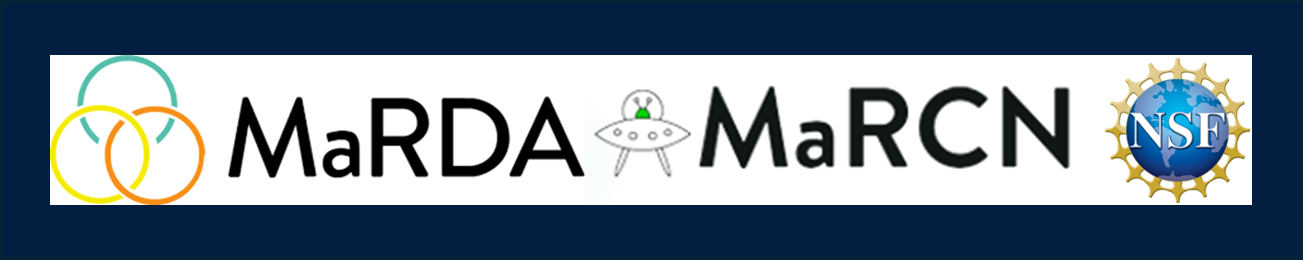

# FAIR Application using Tensile Testing Ontology

Authors: [Erwin Cazares<sup>1</sup>](ecazares3@miners.utep.edu), [Dr Brian E. Schuster<sup>1</sup>](bschuster@utep.edu) </br>

<sup>1</sup> Dynamic Materials Laboratory at University of Texas at El Paso, TX USA 79968</br>

Date of creation: Summer 2024 </br>
Date of last revision: Summer 2024 </br>

# SHACL Validation of Experimental RDF Data

This notebook is designed to validate experimental RDF data using SHACL shapes. SHACL (Shapes Constraint Language) which is used to validate RDF graphs against a set of constraints defined in SHACL shapes. This process ensures that the RDF data conforms to the expected structure and data types. Specifically to our case, we target the [TTO Ontology](https://github.com/materialdigital/application-ontologies/tree/main/tensile_test_ontology_TTO) an application ontology defined by [PMDco](https://github.com/materialdigital/core-ontology)

## Dataset Used

The dataset consists of RDF data representing tensile test results. This data will be validated against SHACL shapes that define the required structure and constraints for tensile test data.

The ontology turtle (.ttl) file used is available at [Tensile Test Ontology (TTO)](https://materialdigital.github.io/application-ontologies/tto/)

## Notebook Structure

The notebook is organized into the following sections:

1. **SHACL Shapes Definition**: Define the SHACL shapes that specify the constraints for the RDF data.
2. **Experimental RDF Data**: Load RDF data representing tensile test results.
3. **Validation**: Validate the RDF data against the SHACL shapes using the `pyshacl` library.
4. **Results**: Display the validation results to determine if the RDF data conforms to the SHACL shapes.

## Usage

To effectively utilize this notebook, follow these instructions:

1. Ensure all required dependencies are installed and configured correctly. Refer to the provided documentation or requirements.txt file for guidance.
2. Define the SHACL shapes that specify the constraints for the RDF data.
3. Load the RDF data representing tensile test results.
4. Validate the RDF data against the SHACL shapes using the `pyshacl` library.
5. Review the validation results to determine if the RDF data conforms to the SHACL shapes.

This notebook provides a comprehensive guide to validating RDF data using SHACL shapes, ensuring that your data adheres to the expected structure and constraints.


In [198]:
import subprocess
import os

# Get the directory of the current script or the parent directory
script_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.path.dirname(os.getcwd())
print(f'Current working directory = {script_dir}')

def install_requirements(requirements_file):
    try:
        subprocess.check_call(['pip', 'install', '-r', requirements_file])
        print("Successfully installed dependencies from", requirements_file)
    except subprocess.CalledProcessError as e:
        print("Error installing dependencies:", e)

if __name__ == "__main__":
    requirements_file = os.path.join(script_dir, "requirements.txt")
    install_requirements(requirements_file)

Current working directory = D:\FAIR_Ontology


In [200]:
import rdflib
from rdflib.namespace import RDF, RDFS, XSD, OWL
from pyshacl import validate
from pyvis.network import Network

# Relative path to the data folder
ontology_folder = os.path.join(script_dir, 'ontology')
print(f'Path to data folder = {ontology_folder}')

results_path = os.path.join(script_dir, 'results')
print(f'Results folder path = {results_path}')

Path to data folder = D:\FAIR_Ontology\ontology
Results folder path = D:\FAIR_Ontology\results


# Exploring TTO Ontology

Let's review the ontology to confirm which properties are available and then create SHACL shapes that are consistent with the ontology.

**Step-by-Step Process:**
- **Review the Ontology:** Identify the properties defined in the TTO.
- **Update SHACL Shapes:** Use only the properties present in the TTO.
- **Validate RDF Data:** Validate the RDF data against the updated SHACL shapes.

### Step 1: Review the Ontology (For TTO Directly)
We'll examine the TTO to list the available properties.

In [202]:
# Load the ontology graph
ontology_graph = rdflib.Graph()
ontology_graph.parse(os.path.join(ontology_folder, "pmd_tto.ttl"), format="turtle")

# List all properties in the ontology
properties = set()
for s, p, o in ontology_graph:
    if isinstance(s, rdflib.URIRef) and isinstance(p, rdflib.URIRef) and str(p).startswith('https://w3id.org/pmd/tto/'):
        properties.add(p)

properties


set()

It seems that there were no properties identified with the namespace https://w3id.org/pmd/tto/ directly. This might be due to the properties being defined with different prefixes or being used differently in the ontology.

Let's try another approach by listing all properties and their prefixes to ensure we capture the correct ones.

### Step 2: Review the Ontology (Using all properties)
We'll examine the ontology to list the available properties by considering all properties in the graph, not just those starting with https://w3id.org/pmd/tto/.

In [2]:
# List all properties in the ontology
properties = set()
for s, p, o in ontology_graph:
    if isinstance(p, rdflib.URIRef):
        properties.add(p)

properties_list = list(properties)
properties_list[:20]  # Display the first 20 properties


[rdflib.term.URIRef('http://www.w3.org/2004/02/skos/core#definition'),
 rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subPropertyOf'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#equivalentClass'),
 rdflib.term.URIRef('http://purl.org/dc/elements/1.1/creator'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#someValuesFrom'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#onProperty'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#intersectionOf'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#unionOf'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#hasValue'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#first'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#qualifiedCardinality'),
 rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
 rdflib.term.URIRef('http://www.w3.org/2002/07/owl#versionInfo'),
 rdflib.term.URIRef('http://purl.org/dc/elements/1.1/license'),
 rdflib.term.URIRef('http://www.w3.org/200

It appears that many of the properties belong to standard RDF and OWL namespaces, with only a few related to the https://w3id.org/pmd/tto/ or https://w3id.org/pmd/co/ namespaces.

Let's filter out properties that are part of the ontology's custom namespaces.

### Step 3: Review Custom Properties in the Ontology
We'll filter out the properties that are part of the custom namespaces.

In [3]:
# Filter properties that belong to the custom namespaces
custom_properties = [p for p in properties if 'https://w3id.org/pmd/tto/' in str(p) 
                     or 'https://w3id.org/pmd/co/' in str(p)]
custom_properties


[rdflib.term.URIRef('https://w3id.org/pmd/co/symbol'),
 rdflib.term.URIRef('https://w3id.org/pmd/co/definitionSource')]

The custom properties identified in the ontology are https://w3id.org/pmd/co/definitionSource and https://w3id.org/pmd/co/symbol. It appears that the properties relevant to tensile testing might not be defined under the custom namespaces initially targeted.

To ensure we cover all relevant properties, let's explore the ontology further to identify any properties that are potentially nested or defined under other classes.

## Step-by-Step Detailed Class Exploration

### Step 1: List All Classes in the Ontology

In [195]:
# List all classes in the ontology
classes = set()
for s, p, o in ontology_graph:
    if p == RDF.type and o == OWL.Class:
        classes.add(s)

classes_list = list(classes)
classes_list[:20]  # Display the first 20 classes for brevity


[rdflib.term.URIRef('https://w3id.org/pmd/tto/SlopeOfTheElasticPart'),
 rdflib.term.URIRef('https://w3id.org/pmd/tto/ProofStrengthPlasticExtension'),
 rdflib.term.URIRef('https://w3id.org/pmd/tto/GaugeLength'),
 rdflib.term.URIRef('https://w3id.org/pmd/tto/YieldStrength'),
 rdflib.term.URIRef('https://w3id.org/pmd/tto/TransitionPointTestingRate'),
 rdflib.term.URIRef('https://w3id.org/pmd/tto/PercentagePermanentExtension'),
 rdflib.term.URIRef('https://w3id.org/pmd/tto/PercentagePermanentElongation'),
 rdflib.term.BNode('n2e79d3b0a83b48b2ba03b4e046d6ebceb26'),
 rdflib.term.BNode('n2e79d3b0a83b48b2ba03b4e046d6ebceb31'),
 rdflib.term.URIRef('https://w3id.org/pmd/co/PercentageExtension'),
 rdflib.term.URIRef('https://w3id.org/pmd/tto/LowerYieldStrength'),
 rdflib.term.URIRef('https://w3id.org/pmd/tto/EstimatedStrainRateOverTheParallelLength'),
 rdflib.term.URIRef('https://w3id.org/pmd/tto/CrossheadSeparation'),
 rdflib.term.URIRef('https://w3id.org/pmd/tto/ExtensometerGaugeLength'),
 rdfl

### Step 2: Explore the Ontology for Specific Properties

We'll look for specific properties related to tensile testing, such as YoungsModulus, YieldStrength, and others directly in the ontology data.

Let's retrieve were these properties are mentioned in the ontology by searching for their URIs or parts of them.

Note: We can include specific properties found in https://materialdigital.github.io/application-ontologies/tto/ to capture the assigned class

We have identified several classes in the ontology. Here are a few relevant ones:

- https://w3id.org/pmd/tto/PercentageElongation
- https://w3id.org/pmd/tto/ExtensometerGaugeLength
- https://w3id.org/pmd/co/Force
- https://w3id.org/pmd/tto/GaugeLength
- https://w3id.org/pmd/tto/FinalGaugeLengthAfterFracture
- https://w3id.org/pmd/tto/MinimumCrossSectionalAreaAfterFracture
- https://w3id.org/pmd/tto/ProofStrengthTotalExtension
- https://w3id.org/pmd/tto/OriginalDiameter
- https://w3id.org/pmd/co/Length
- https://w3id.org/pmd/tto/ProofStrengthPlasticExtension
- https://w3id.org/pmd/tto/OriginalCrossSectionalArea
- https://w3id.org/pmd/tto/ParallelLength

These properties are present in the ontology and can be used in the SHACL shapes.

In [24]:
# Search for specific tensile testing classes in the ontology
specific_properties = [
    "https://w3id.org/pmd/tto/OriginalGaugeLength", 
    "https://w3id.org/pmd/tto/OriginalWidth", 
    "https://w3id.org/pmd/tto/OriginalThickness", 
    "https://w3id.org/pmd/tto/YoungsModulus",
    "https://w3id.org/pmd/tto/YieldStrength",
    "https://w3id.org/pmd/tto/UltimateTensileStrength",
    "https://w3id.org/pmd/co/PercentageExtension",
]

# Extract relevant details about the classes
class_details = {}
for class_uri in specific_properties:
    class_node = rdflib.URIRef(class_uri)
    properties = []
    for s, p, o in ontology_graph.triples((class_node, None, None)):
        properties.append((p, o))
    class_details[class_uri] = properties

# Print the class details
for class_uri, details in class_details.items():
    print(f"Class: {class_uri}")
    for prop, obj in details:
        print(f"  {prop}: {obj}")
    print()

Class: https://w3id.org/pmd/tto/OriginalGaugeLength
  http://www.w3.org/1999/02/22-rdf-syntax-ns#type: http://www.w3.org/2002/07/owl#Class
  http://www.w3.org/2000/01/rdf-schema#subClassOf: https://w3id.org/pmd/tto/GaugeLength
  http://www.w3.org/2000/01/rdf-schema#isDefinedBy: https://w3id.org/pmd/tto
  http://www.w3.org/2000/01/rdf-schema#label: Anfangsmesslänge
  http://www.w3.org/2000/01/rdf-schema#label: Original Gauge Length
  http://www.w3.org/2004/02/skos/core#definition: Länge zwischen den Marken zur Kennzeichnung der Messlänge auf der Probe, die vor dem Versuch bei Raumtemperatur gemessen wird
  http://www.w3.org/2004/02/skos/core#definition: Symbol: L_o
  http://www.w3.org/2004/02/skos/core#definition: length between gauge length marks on the test piece measured at room temperature before the test
  https://w3id.org/pmd/co/definitionSource: DIN EN ISO 6892-1:2019

Class: https://w3id.org/pmd/tto/OriginalWidth
  http://www.w3.org/1999/02/22-rdf-syntax-ns#type: http://www.w3.o

### Step 3: Include Classes from Core Ontology

Here we use a similar approach to retreve the class properties for MaterialDesignation, PrimaryData, SecondaryData, and Unit from the [core ontology](https://materialdigital.github.io/core-ontology) to be included in our graph

In [204]:
# Load the core ontology graph
core_ontology_graph = rdflib.Graph()
core_ontology_graph.parse(os.path.join(ontology_folder, "pmd_core.ttl"), format="turtle")

# Define the classes we are looking for
classes_of_interest = [
    "https://w3id.org/pmd/co/PrimaryData",
    "https://w3id.org/pmd/co/SecondaryData",
    "https://w3id.org/pmd/co/MaterialDesignation",
    "https://w3id.org/pmd/co/unit"
]

# Extract relevant details about the classes
class_details = {}
for class_uri in classes_of_interest:
    class_node = rdflib.URIRef(class_uri)
    properties = []
    for s, p, o in core_ontology_graph.triples((class_node, None, None)):
        properties.append((p, o))
    class_details[class_uri] = properties

# Print the class details
for class_uri, details in class_details.items():
    print(f"Class: {class_uri}")
    for prop, obj in details:
        print(f"  {prop}: {obj}")
    print()

Class: https://w3id.org/pmd/co/PrimaryData
  http://www.w3.org/1999/02/22-rdf-syntax-ns#type: http://www.w3.org/2002/07/owl#Class
  http://www.w3.org/2000/01/rdf-schema#subClassOf: https://w3id.org/pmd/co/DataScope
  http://www.w3.org/2002/07/owl#disjointWith: https://w3id.org/pmd/co/SecondaryData
  http://www.w3.org/2000/01/rdf-schema#isDefinedBy: https://w3id.org/pmd/co
  http://www.w3.org/2000/01/rdf-schema#label: Primary Data
  http://www.w3.org/2000/01/rdf-schema#label: Primärdaten
  http://www.w3.org/2004/02/skos/core#definition: Die Datenkategorie Primärdaten umfasst Daten, die vor / nach einem Prozess erfasst werden, entweder bezogen auf die Geometrie des Objekts (z.B. ao, bo, do, au, bu, du, Lu) oder als Register des gesamten Aufbaus (z.B. Skizzen, Fotos oder Videos)
  http://www.w3.org/2004/02/skos/core#definition: This data scope expresses that a ValueObject refers to data that is directly acquired during a process by sensors (time, force, length, temperature)

Class: https:

## Creating SHACL Shapes Based on Found Properties
Based on these clases, we'll update our SHACL shapes to include only those present in the ontology. The resulting output file will be used as a validation tool in further notebooks, here we set the basis of our analysis.

This script dynamically constructs the SHACL shapes based on the properties found in the ontology. Each property is defined as a sh:property with constraints such as sh:datatype xsd:float, sh:minInclusive 0, and sh:minCount 1. 

A breakdown description of the shapes is also provided for clarity.

In [205]:
# Define namespaces
SH = rdflib.Namespace("http://www.w3.org/ns/shacl#")
TTO = rdflib.Namespace("https://w3id.org/pmd/tto/")
CORE = rdflib.Namespace("https://w3id.org/pmd/co/")
XSD = rdflib.namespace.XSD

# Create a new graph
g = rdflib.Graph()

# Bind namespaces
g.bind("sh", SH)
g.bind("tto", TTO)
g.bind("core", CORE)
g.bind("xsd", XSD)

# Add the TensileTest shape
tensile_test_shape = rdflib.BNode()
g.add((tensile_test_shape, rdflib.RDF.type, SH.NodeShape))
g.add((tensile_test_shape, SH.targetClass, TTO.TensileTest))

# Function to add property shape with unit validation
def add_property_shape(graph, shape, property_uri, unit_uri):
    prop_shape = rdflib.BNode()
    graph.add((shape, SH.property, prop_shape))
    graph.add((prop_shape, SH.path, rdflib.URIRef(property_uri)))
    graph.add((prop_shape, SH.minCount, rdflib.Literal(1, datatype=XSD.integer)))
    
    value_shape = rdflib.BNode()
    graph.add((prop_shape, SH.node, value_shape))
    graph.add((value_shape, rdflib.RDF.type, SH.NodeShape))
    
    value_property = rdflib.BNode()
    graph.add((value_shape, SH.property, value_property))
    graph.add((value_property, SH.path, rdflib.RDF.value))
    graph.add((value_property, SH.datatype, XSD.float))
    graph.add((value_property, SH.minInclusive, rdflib.Literal(0, datatype=XSD.float)))
    graph.add((value_property, SH.minCount, rdflib.Literal(1, datatype=XSD.integer)))
    
    unit_property = rdflib.BNode()
    graph.add((value_shape, SH.property, unit_property))
    graph.add((unit_property, SH.path, CORE.unit))
    graph.add((unit_property, SH.hasValue, rdflib.URIRef(unit_uri)))
    graph.add((unit_property, SH.minCount, rdflib.Literal(1, datatype=XSD.integer)))

# Add property shapes with units
add_property_shape(g, tensile_test_shape, TTO.OriginalGaugeLength, "https://w3id.org/pmd/co/unit#mm")
add_property_shape(g, tensile_test_shape, TTO.OriginalWidth, "https://w3id.org/pmd/co/unit#mm")
add_property_shape(g, tensile_test_shape, TTO.OriginalThickness, "https://w3id.org/pmd/co/unit#mm")
add_property_shape(g, tensile_test_shape, TTO.YoungsModulus, "https://w3id.org/pmd/co/unit#MPa")
add_property_shape(g, tensile_test_shape, TTO.YieldStrength, "https://w3id.org/pmd/co/unit#MPa")
add_property_shape(g, tensile_test_shape, TTO.UltimateTensileStrength, "https://w3id.org/pmd/co/unit#MPa")
add_property_shape(g, tensile_test_shape, TTO.PercentageExtension, "https://w3id.org/pmd/co/unit#percent")

# Add simple string properties
def add_string_property_shape(graph, shape, property_uri):
    prop = rdflib.BNode()
    graph.add((shape, SH.property, prop))
    graph.add((prop, SH.path, rdflib.URIRef(property_uri)))
    graph.add((prop, SH.datatype, XSD.string))
    graph.add((prop, SH.minCount, rdflib.Literal(1, datatype=XSD.integer)))

add_string_property_shape(g, tensile_test_shape, CORE.PrimaryData)
add_string_property_shape(g, tensile_test_shape, CORE.SecondaryData)
add_string_property_shape(g, tensile_test_shape, CORE.MaterialDesignation)

# Serialize the graph to a Turtle file
output_file = os.path.join(ontology_folder, "tto_shapes.ttl")
g.serialize(destination=output_file, format="turtle")

print("SHACL shapes created and serialized to", output_file)

SHACL shapes created and serialized to D:\FAIR_Ontology\ontology\tto_shapes.ttl


Now, lets look at the output file

In [146]:
# Read and display the contents of the generated TTL file
with open(output_file, 'r') as file:
    ttl_content = file.read()

print(ttl_content)

@prefix core: <https://w3id.org/pmd/co/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix sh: <http://www.w3.org/ns/shacl#> .
@prefix tto: <https://w3id.org/pmd/tto/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

[] a sh:NodeShape ;
    sh:property [ sh:minCount 1 ;
            sh:node [ a sh:NodeShape ;
                    sh:property [ sh:hasValue <https://w3id.org/pmd/co/unit#mm> ;
                            sh:minCount 1 ;
                            sh:path core:unit ],
                        [ sh:datatype xsd:float ;
                            sh:minCount 1 ;
                            sh:minInclusive "0"^^xsd:float ;
                            sh:path rdf:value ] ] ;
            sh:path tto:OriginalThickness ],
        [ sh:minCount 1 ;
            sh:node [ a sh:NodeShape ;
                    sh:property [ sh:hasValue <https://w3id.org/pmd/co/unit#mm> ;
                            sh:minCount 1 ;
                            sh:path core:unit 

### SHACL Shapes Breakdown

SHACL (Shapes Constraint Language) is used to validate RDF graphs against a set of constraints (shapes). In our case, we want to validate tensile test data.

**Prefix Declarations** 

`
@prefix core: <https://w3id.org/pmd/co/> .
@prefix sh: <http://www.w3.org/ns/shacl#> .
@prefix tto: <https://w3id.org/pmd/tto/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
`
- **@prefix core:** This defines the namespace for the Core Ontology
- **@prefix sh::** This defines the SHACL namespace used for defining shapes constraints.
- **@prefix tto::** This defines the namespace for the Tensile Testing Ontology (TTO).
- **@prefix xsd::** This defines the XML Schema Definition (XSD) namespace used for data types like xsd:float.


**Node Shape Declaration**

`
<https://example.org/shapes/TensileTestShape> a sh:NodeShape ;
`
- **<https://example.org/shapes/TensileTestShape>:** This declares a shape named TensileTest within the TTO namespace.
- **a sh:NodeShape:** This indicates that TensileTest is a node shape. Node shapes are used to constrain RDF nodes (subjects).

**Property Shapes**

`
sh:property [
    sh:datatype xsd:float ;
    sh:minInclusive 0 ;
    sh:path tto:OriginalGaugeLength ;
    sh:minCount 1`
- **sh:property:** This defines a property shape, which constrains a specific property of the nodes targeted by the node shape.
- **sh:datatype xsd:float:** This specifies that the property value must be of type xsd:float.
- **sh:minInclusive 0:** This constraint ensures that the property value must be greater than or equal to 0.
- **sh:path tto:OriginalGaugeLength:** This specifies the property being constrained, in this case, tto:OriginalGaugeLength.
- **sh:minCount 1:** This ensures that the property must appear at least once in the node being validated.

**Target Class**

`
sh:targetClass tto:TensileTest .
`
- **sh:targetClass tto:TensileTest:** This indicates that the shape applies to all nodes of type tto:TensileTest.


```

```

### Validation Process using SHACL Shapes

The validation process involves:

- **Creating an RDF graph:** This graph contains the experimental data to be validated.
- **Defining SHACL shapes:** The shapes are defined to specify the constraints that the RDF graph must adhere to.
- **Running validation:** Using a SHACL validation engine (e.g., pyshacl), the RDF graph is validated against the SHACL shapes.

The validation results will indicate whether the data conforms to the constraints defined in the shapes. If the data does not conform, the results will detail which constraints were violated.

## Example on how to validate Experimental RDF Data

### Step 1: Define the RDF Data
We'll create an RDF graph containing experimental tensile test data. For the purpose of this example, let's assume the following experimental values:

- Material: Steel
- Sample Length: 100.0 mm
- Width: 10.0 mm
- Thickness: 1.0 mm
- Young's Modulus: 200.0 MPa
- Yield Strength: 150.0 MPa
- Ultimate Tensile Strength (UTS): 250.0 MPa
- Percentage Extension: 0.15
- Primary Data:
- Secondary Data:

In [218]:
# Create an RDF graph for the experimental data
data_graph = rdflib.Graph()

# Add namespaces
TTO = rdflib.Namespace("https://w3id.org/pmd/tto/")
CORE = rdflib.Namespace("https://w3id.org/pmd/co/")
data_graph.bind("tto", TTO)
data_graph.bind("core", CORE)

# Define the tensile test instance
test_instance = rdflib.URIRef("https://example.org/tensile_test")

# Add the tensile test instance to the graph
data_graph.add((test_instance, rdflib.RDF.type, TTO.TensileTest))

# Function to add property with unit as a blank node
def add_property_with_unit(graph, instance, property_uri, value, unit):
    value_node = rdflib.BNode()
    graph.add((instance, property_uri, value_node))
    graph.add((value_node, rdflib.RDF.type, CORE.ValueObject))
    graph.add((value_node, rdflib.RDF.value, rdflib.Literal(value, datatype=rdflib.XSD.float)))
    graph.add((value_node, CORE.unit, rdflib.URIRef(unit)))

# Add properties with units to the tensile test instance
add_property_with_unit(data_graph, test_instance, TTO.OriginalGaugeLength, 100.0, "https://w3id.org/pmd/co/unit#mm")
add_property_with_unit(data_graph, test_instance, TTO.OriginalWidth, 10.0, "https://w3id.org/pmd/co/unit#mm")
add_property_with_unit(data_graph, test_instance, TTO.OriginalThickness, 1.0, "https://w3id.org/pmd/co/unit#mm")
add_property_with_unit(data_graph, test_instance, TTO.YoungsModulus, 200.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(data_graph, test_instance, TTO.YieldStrength, 150.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(data_graph, test_instance, TTO.UltimateTensileStrength, 250.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(data_graph, test_instance, TTO.PercentageExtension, 0.15, "https://w3id.org/pmd/co/unit#percent")

# Add PrimaryData, SecondaryData, and MaterialDesignation as strings
data_graph.add((test_instance, CORE.PrimaryData, rdflib.Literal("Primary data example", datatype=rdflib.XSD.string)))
data_graph.add((test_instance, CORE.SecondaryData, rdflib.Literal("Secondary data example", datatype=rdflib.XSD.string)))
data_graph.add((test_instance, CORE.MaterialDesignation, rdflib.Literal("Steel", datatype=rdflib.XSD.string)))

# Serialize the RDF data to a TTL file
output_file = os.path.join(ontology_folder, "experimental_data.ttl")
data_graph.serialize(destination=output_file, format="turtle")

print(f"Experimental RDF data serialized to {output_file}")

Experimental RDF data serialized to D:\FAIR_Ontology\ontology\experimental_data.ttl


Now, lets look at the output RDF graph generated 

In [129]:
# Read and display the contents of the generated TTL file
with open(output_file, 'r') as file:
    ttl_content = file.read()

print(ttl_content)

@prefix core: <https://w3id.org/pmd/co/> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix tto: <https://w3id.org/pmd/tto/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<https://example.org/tensile_test_1> a tto:TensileTest ;
    core:MaterialDesignation "Steel"^^xsd:string ;
    core:PrimaryData "Primary data example"^^xsd:string ;
    core:SecondaryData "Secondary data example"^^xsd:string ;
    tto:OriginalGaugeLength [ a core:ValueObject ;
            rdf:value "100.0"^^xsd:float ;
            core:unit <https://w3id.org/pmd/co/unit#mm> ] ;
    tto:OriginalThickness [ a core:ValueObject ;
            rdf:value "1.0"^^xsd:float ;
            core:unit <https://w3id.org/pmd/co/unit#mm> ] ;
    tto:OriginalWidth [ a core:ValueObject ;
            rdf:value "10.0"^^xsd:float ;
            core:unit <https://w3id.org/pmd/co/unit#mm> ] ;
    tto:PercentageExtension [ a core:ValueObject ;
            rdf:value "0.15"^^xsd:float ;
            core:unit <https:

### Step 2: Create the SHACL Shapes
The SHACL shapes will define the constraints that our RDF data must adhere to. We'll use the shapes based on the properties we identified earlier.

### Step 3: Validate the RDF Data
We will use the **pyshacl** library to validate the RDF data against the SHACL shapes.

#### Case 1: Compliant Data 
All required properties are present and correctly defined.

In [208]:
# Load the experimental data graph
data_graph = rdflib.Graph()
data_graph.parse(os.path.join(ontology_folder, "experimental_data.ttl"), format="turtle")

# Load the SHACL shapes graph
shapes_graph = rdflib.Graph()
shapes_graph.parse(os.path.join(ontology_folder, "tto_shapes.ttl"), format="turtle")

# Validate the experimental data against the SHACL shapes
results = validate(data_graph, shacl_graph=shapes_graph, 
                   inference='rdfs', abort_on_first=False, meta_shacl=False, advanced=True)

# Extract validation results
conforms, results_graph, results_text = results

print("Conforms:", conforms)
print("Results Text:", results_text)


Conforms: True
Results Text: Validation Report
Conforms: True



#### Case 2: Missing Values
Some required properties are missing.

In [209]:
# Create an RDF graph for the experimental data
case_2 = rdflib.Graph()

# Add namespaces
TTO = rdflib.Namespace("https://w3id.org/pmd/tto/")
CORE = rdflib.Namespace("https://w3id.org/pmd/co/")
case_2.bind("tto", TTO)
case_2.bind("core", CORE)

# Define the tensile test instance
test_instance = rdflib.URIRef("https://example.org/tensile_test_1")

# Add the tensile test instance to the graph
case_2.add((test_instance, rdflib.RDF.type, TTO.TensileTest))

# Function to add property with unit as a blank node
def add_property_with_unit(graph, instance, property_uri, value, unit):
    value_node = rdflib.BNode()
    graph.add((instance, property_uri, value_node))
    graph.add((value_node, rdflib.RDF.type, CORE.ValueObject))
    graph.add((value_node, rdflib.RDF.value, rdflib.Literal(value, datatype=rdflib.XSD.float)))
    graph.add((value_node, CORE.unit, rdflib.URIRef(unit)))

# Add properties with units to the tensile test instance
add_property_with_unit(case_2, test_instance, TTO.OriginalGaugeLength, 100.0, "https://w3id.org/pmd/co/unit#mm")
add_property_with_unit(case_2, test_instance, TTO.OriginalWidth, 10.0, "https://w3id.org/pmd/co/unit#mm")
add_property_with_unit(case_2, test_instance, TTO.OriginalThickness, 1.0, "https://w3id.org/pmd/co/unit#mm")
add_property_with_unit(case_2, test_instance, TTO.YoungsModulus, 200.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(case_2, test_instance, TTO.YieldStrength, 150.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(case_2, test_instance, TTO.YieldStrength, 150.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(case_2, test_instance, TTO.YieldStrength, 150.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(case_2, test_instance, TTO.UltimateTensileStrength, 250.0, "https://w3id.org/pmd/co/unit#MPa")

# Removed Property
#add_property_with_unit(case_2, test_instance, TTO.PercentageExtension, 0.15, "https://w3id.org/pmd/co/unit#percent")


# Add PrimaryData, SecondaryData, and MaterialDesignation as strings

# Removed for this case example
#case_2.add((test_instance, CORE.PrimaryData, rdflib.Literal("Primary data example", datatype=rdflib.XSD.string)))

case_2.add((test_instance, CORE.SecondaryData, rdflib.Literal("Secondary data example", datatype=rdflib.XSD.string)))
case_2.add((test_instance, CORE.MaterialDesignation, rdflib.Literal("Steel", datatype=rdflib.XSD.string)))

# Serialize the RDF data to a TTL file
output_file = os.path.join(ontology_folder, "case_2.ttl")
case_2.serialize(destination=output_file, format="turtle")

print(f"Experimental RDF data for case 2 serialized to {output_file}")


Experimental RDF data for case 2 serialized to D:\FAIR_Ontology\ontology\case_2.ttl


In [213]:
# Load the experimental data graph
case_2_graph = rdflib.Graph()
case_2_graph.parse(os.path.join(ontology_folder, "case_2.ttl"), format="turtle")

# Load the SHACL shapes graph
shapes_graph = rdflib.Graph()
shapes_graph.parse(os.path.join(ontology_folder, "tto_shapes.ttl"), format="turtle")

# Validate the experimental data against the SHACL shapes
results = validate(case_2_graph, shacl_graph=shapes_graph, 
                   inference='rdfs', abort_on_first=False, meta_shacl=False, advanced=True)

# Extract validation results
conforms, results_graph, results_text = results

# Print validation results
print("Conforms:", conforms)
print("Results:", results_text)

Conforms: False
Results: Validation Report
Conforms: False
Results (2):
Constraint Violation in MinCountConstraintComponent (http://www.w3.org/ns/shacl#MinCountConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ sh:minCount Literal("1", datatype=xsd:integer) ; sh:node [ rdf:type sh:NodeShape ; sh:property [ sh:datatype xsd:float ; sh:minCount Literal("1", datatype=xsd:integer) ; sh:minInclusive Literal("0.0", datatype=xsd:float) ; sh:path rdf:value ], [ sh:hasValue <https://w3id.org/pmd/co/unit#percent> ; sh:minCount Literal("1", datatype=xsd:integer) ; sh:path core:unit ] ] ; sh:path tto:PercentageExtension ]
	Focus Node: <https://example.org/tensile_test_1>
	Result Path: tto:PercentageExtension
	Message: Less than 1 values on <https://example.org/tensile_test_1>->tto:PercentageExtension
Constraint Violation in MinCountConstraintComponent (http://www.w3.org/ns/shacl#MinCountConstraintComponent):
	Severity: sh:Violation
	Source Shape: [ sh:datatype xsd:string ; sh:minCount L

#### Case 3: RDf Graph Extended Data
Contains more properties than defined in the SHACL shapes.

In [211]:
# Create an RDF graph for the experimental data
case_3 = rdflib.Graph()

# Add namespaces
TTO = rdflib.Namespace("https://w3id.org/pmd/tto/")
CORE = rdflib.Namespace("https://w3id.org/pmd/co/")
case_3.bind("tto", TTO)
case_3.bind("core", CORE)

# Define the tensile test instance
test_instance = rdflib.URIRef("https://example.org/tensile_test_1")

# Add the tensile test instance to the graph
case_3.add((test_instance, rdflib.RDF.type, TTO.TensileTest))

# Function to add property with unit as a blank node
def add_property_with_unit(graph, instance, property_uri, value, unit):
    value_node = rdflib.BNode()
    graph.add((instance, property_uri, value_node))
    graph.add((value_node, rdflib.RDF.type, CORE.ValueObject))
    graph.add((value_node, rdflib.RDF.value, rdflib.Literal(value, datatype=rdflib.XSD.float)))
    graph.add((value_node, CORE.unit, rdflib.URIRef(unit)))

# Add properties with units to the tensile test instance
add_property_with_unit(case_3, test_instance, TTO.OriginalGaugeLength, 100.0, "https://w3id.org/pmd/co/unit#mm")
add_property_with_unit(case_3, test_instance, TTO.OriginalWidth, 10.0, "https://w3id.org/pmd/co/unit#mm")
add_property_with_unit(case_3, test_instance, TTO.OriginalThickness, 1.0, "https://w3id.org/pmd/co/unit#mm")
add_property_with_unit(case_3, test_instance, TTO.YoungsModulus, 200.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(case_3, test_instance, TTO.YieldStrength, 150.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(case_3, test_instance, TTO.YieldStrength, 150.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(case_3, test_instance, TTO.YieldStrength, 150.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(case_3, test_instance, TTO.UltimateTensileStrength, 250.0, "https://w3id.org/pmd/co/unit#MPa")
add_property_with_unit(case_3, test_instance, TTO.PercentageExtension, 0.15, "https://w3id.org/pmd/co/unit#percent")
# Added Property
add_property_with_unit(case_3, test_instance, TTO.GaugeLength, 0.15, "https://w3id.org/pmd/co/unit#percent")

# Add PrimaryData, SecondaryData, and MaterialDesignation as strings
case_3.add((test_instance, CORE.PrimaryData, rdflib.Literal("Primary data example", datatype=rdflib.XSD.string)))
case_3.add((test_instance, CORE.SecondaryData, rdflib.Literal("Secondary data example", datatype=rdflib.XSD.string)))
case_3.add((test_instance, CORE.MaterialDesignation, rdflib.Literal("Steel", datatype=rdflib.XSD.string)))

# Serialize the RDF data to a TTL file
output_file = os.path.join(ontology_folder, "case_3.ttl")
case_3.serialize(destination=output_file, format="turtle")

print(f"Experimental RDF data for case 3 serialized to {output_file}")

Experimental RDF data for case 3 serialized to D:\FAIR_Ontology\ontology\case_3.ttl


In [212]:
# Load the experimental data graph
case_3_graph = rdflib.Graph()
case_3_graph.parse(os.path.join(ontology_folder, "case_3.ttl"), format="turtle")

# Load the SHACL shapes graph
shapes_graph = rdflib.Graph()
shapes_graph.parse(os.path.join(ontology_folder, "tto_shapes.ttl"), format="turtle")

# Validate the experimental data against the SHACL shapes
results = validate(case_3_graph, shacl_graph=shapes_graph, 
                   inference='rdfs', abort_on_first=False, meta_shacl=False, advanced=True)

# Extract validation results
conforms, results_graph, results_text = results

# Print validation results
print("Conforms:", conforms)
print("Results:", results_text)

Conforms: True
Results: Validation Report
Conforms: True



In SHACL, having extra properties in your RDF data that are not constrained by the SHACL shapes typically does not cause a validation error. SHACL shapes are designed to validate constraints on properties that are specified within the shapes. If a property is not mentioned in the SHACL shapes, it is simply ignored during the validation process.

This is why the validation report does not flag the extra property in Case 3. The SHACL shapes only enforce constraints on properties that are explicitly defined within them.

This allows adaptivity of the Graph to be compliant with multiple SHACL files referring to different ontologies

## Visualize Graphs

In [216]:
def visualize_rdf_graph(rdf_graph, output_file):
    net = Network(notebook=True)
    
    for s, p, o in rdf_graph:
        s_label = str(s)
        p_label = str(p)
        o_label = str(o)
        
        net.add_node(s_label, label=s_label)
        net.add_node(o_label, label=o_label)
        net.add_edge(s_label, o_label, title=p_label)
    
    net.show(output_file)

# Load the experimental data graph
data_graph = rdflib.Graph()
data_graph.parse(os.path.join(ontology_folder, "experimental_data.ttl"), format="turtle")

# Visualize the experimental data graph
visualize_rdf_graph(data_graph, os.path.join(ontology_folder,"data_graph.html"))

# Load the SHACL shapes graph
shapes_graph = rdflib.Graph()
shapes_graph.parse(os.path.join(ontology_folder, "tto_shapes.ttl"), format="turtle")

# Visualize the SHACL shapes graph
visualize_rdf_graph(shapes_graph, os.path.join(ontology_folder, "shapes_graph.html"))


D:\FAIR_Ontology\ontology\data_graph.html
D:\FAIR_Ontology\ontology\shapes_graph.html
